In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import pandas as pd

def load_dataset(fol_path):
    # Đọc các mẫu dữ liệu từ sentences.txt
    with open(fol_path+'/sents.txt', "r", encoding = 'utf-8') as file:
        sentences = [line.strip() for line in file]
    
    # Đọc nhãn cho các mẫu dữ liệu đã load ở trên từ file labels.txt
    with open(fol_path+"/sentiments.txt", "r", encoding = 'utf-8') as file:
        labels = [int(line.strip()) for line in file]

    assert len(sentences) == len(labels), 'Số lượng mẫu dữ liệu và nhãn không khớp'

    df = pd.DataFrame({"text": sentences, "label":labels})

    return df

In [3]:
train = load_dataset("Dataset/train")
test = load_dataset("Dataset/test")

In [4]:
train

,text,label
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2
...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,0
11422,em cảm ơn cô nhiều .,2
11423,giao bài tập quá nhiều .,0
11424,"giáo viên dạy dễ hiểu , nhiệt tình .",2


In [5]:
test

,text,label
0,nói tiếng anh lưu loát .,2
1,giáo viên rất vui tính .,2
2,cô max có tâm .,2
3,"giảng bài thu hút , dí dỏm .",2
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",0
...,...,...
3161,"các slide khó hiểu , ngôn ngữ trong slide phức...",0
3162,giáo viên giảng dạy có tâm huyết .,2
3163,chia sẻ cho em nhiều điều hay .,2
3164,em tiếp thu chậm .,0


In [6]:
X_train = train['text']
y_train = train['label']
X_test = test['text']
y_test = test['label']

In [7]:
accuracy_ = []
precision_ = []
recall_ = []
f1score_ = []

## Bài 1: Mã hoá văn bản bằng kỹ thuật Counting. Huấn luyện phương pháp Naive Bayes, SVM và Softmax Regression. Sử dụng các độ đo accuracy, precision, recall và F1 để đánh giá mô hình huấn luyện được.

In [8]:
count_vectorizer = CountVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [9]:
def training_and_evaluate(models, X, X_):
    for name, model in models:
        model.fit(X, y_train)
        y_pred = model.predict(X_)

        accu = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracy_.append(accu)
        precision_.append(pre)
        recall_.append(recall)
        f1score_.append(f1)

        print(f"Evaluate model {name}:")
        print(f"Accuracy: {accu:.4f}")
        print(f"Precision: {pre:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1_score: {f1:.4f}")

In [10]:
models = [("Naive Bayes", MultinomialNB()), 
          ("SVC", SVC()), 
          ("Softmax Regression", LogisticRegression(multi_class="multinomial", solver='saga', tol = 0.008))]

In [11]:
training_and_evaluate(models, X_train_count, X_test_count)

Evaluate model Naive Bayes:
Accuracy: 0.8402
Precision: 0.8273
Recall: 0.8402
F1_score: 0.8266
Evaluate model SVC:
Accuracy: 0.8860
Precision: 0.8770
Recall: 0.8860
F1_score: 0.8660
Evaluate model Softmax Regression:
Accuracy: 0.8863
Precision: 0.8743
Recall: 0.8863
F1_score: 0.8740


## Bài 2: Mã hoá văn bản bằng kỹ thuật TF-IDF. Huấn luyện phương pháp Naive Bayes, SVM và Softmax Regression. Sử dụng các độ đo accuracy, precision, recall và F1 để đánh giá mô hình huấn luyện được.

In [12]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf= tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

training_and_evaluate(models, X_train_tfidf, X_test_tfidf)

Evaluate model Naive Bayes:
Accuracy: 0.8402
Precision: 0.8013
Recall: 0.8402
F1_score: 0.8180
Evaluate model SVC:
Accuracy: 0.8898
Precision: 0.8904
Recall: 0.8898
F1_score: 0.8730
Evaluate model Softmax Regression:
Accuracy: 0.8806
Precision: 0.8713
Recall: 0.8806
F1_score: 0.8635


## Bài 3: Sử dụng VnCoreNLP thực hiện tách từ. Mã hoá văn bản bằng kỹ thuật TF-IDF. Huấn luyện phương pháp Naive Bayes, SVM và Softmax Regression. Sử dụng các độ đo accuracy, precision, recall và F1 để đánh giá mô hình huấn luyện được. Nhận xét ảnh hưởng của việc tách từ lên kết quả của mô hình SVM

In [13]:
accuracy_

[0.8401768793430195,
 0.8859759949463045,
 0.8862918509159823,
 0.8401768793430195,
 0.8897662665824384,
 0.8806064434617814]

In [14]:
from vncorenlp import VnCoreNLP

rdrsegmenter = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx2g')


In [15]:
def word_segment(text):
    out = []
    for sentence in text:
        out.append(' '.join(rdrsegmenter.tokenize(sentence)[0]))
    return out

In [16]:
X_train_ = word_segment(X_train)
X_test_ = word_segment(X_test)

In [17]:
X_train_vncorenlp_tfidf_ = tfidf_vectorizer.fit_transform(X_train_)
X_test_vncorenlp_tfidf_ = tfidf_vectorizer.transform(X_test_)

In [18]:
training_and_evaluate(models, X_train_vncorenlp_tfidf_, X_test_vncorenlp_tfidf_)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluate model Naive Bayes:
Accuracy: 0.8506
Precision: 0.8098
Recall: 0.8506
F1_score: 0.8279
Evaluate model SVC:
Accuracy: 0.8942
Precision: 0.8916
Recall: 0.8942
F1_score: 0.8766
Evaluate model Softmax Regression:
Accuracy: 0.8863
Precision: 0.8774
Recall: 0.8863
F1_score: 0.8681


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kết quả của các phương pháp mã hóa
results = {
    'Method': ['Naive Bayes', 'SVM', 'Softmax Regression',
               'Naive Bayes', 'SVM', 'Softmax Regression',
               'Naive Bayes', 'SVM', 'Softmax Regression'],
    'Encoding': ['Count', 'Count', 'Count',
                 'TF-IDF', 'TF-IDF', 'TF-IDF',
                 'VnCoreNLP', 'VnCoreNLP', 'VnCoreNLP'],
    'Accuracy': accuracy_,
    'Precision': precision_,
    'Recall': recall_,
    'F1 Score': f1score_
}

# Tạo DataFrame từ kết quả
df = pd.DataFrame(results)

df

,Method,Encoding,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,Count,0.840177,0.827286,0.840177,0.826608
1,SVM,Count,0.885976,0.876962,0.885976,0.866002
2,Softmax Regression,Count,0.886292,0.874300,0.886292,0.873997
3,Naive Bayes,TF-IDF,0.840177,0.801286,0.840177,0.818026
4,SVM,TF-IDF,0.889766,0.890380,0.889766,0.872955
5,Softmax Regression,TF-IDF,0.880606,0.871295,0.880606,0.863495
6,Naive Bayes,VnCoreNLP,0.850600,0.809755,0.850600,0.827930
7,SVM,VnCoreNLP,0.894188,0.891621,0.894188,0.876607
8,Softmax Regression,VnCoreNLP,0.886292,0.877430,0.886292,0.868054


In [20]:
# Lọc DataFrame để chỉ giữ lại các hàng có 'Method' là 'SVM'
df_svm = df[df['Method'] == 'SVM']

# Chuyển đổi DataFrame để thuận tiện cho việc vẽ biểu đồ
df_svm_melted = df_svm.melt(id_vars=['Encoding'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'], 
                            var_name='Metric', value_name='Score')

df_svm_melted


,Encoding,Metric,Score
0,Count,Accuracy,0.885976
1,TF-IDF,Accuracy,0.889766
2,VnCoreNLP,Accuracy,0.894188
3,Count,Precision,0.876962
4,TF-IDF,Precision,0.890380
5,VnCoreNLP,Precision,0.891621
6,Count,Recall,0.885976
7,TF-IDF,Recall,0.889766
8,VnCoreNLP,Recall,0.894188
9,Count,F1 Score,0.866002


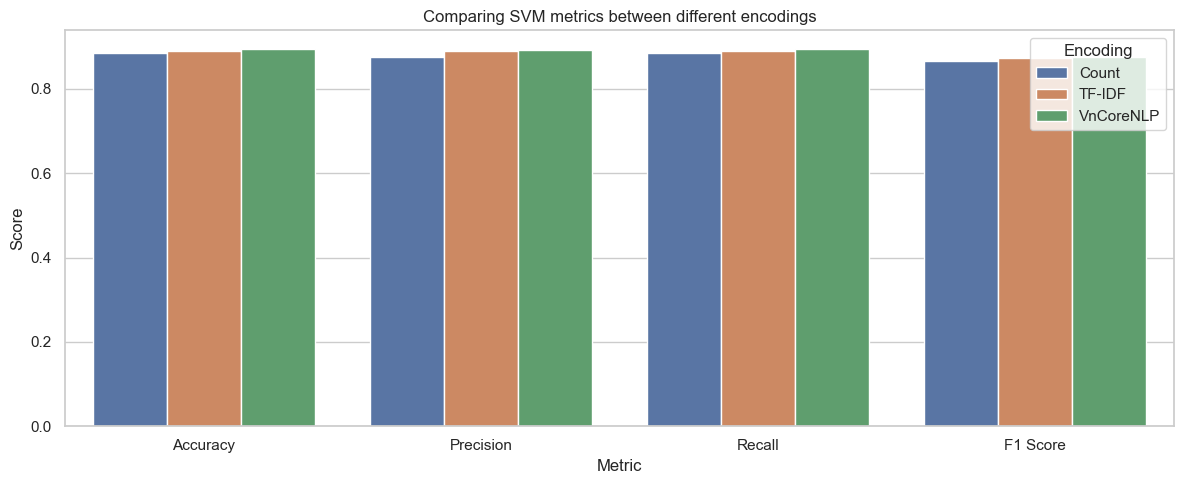

In [21]:
# Thiết lập kiểu hiển thị của seaborn
sns.set(style="whitegrid")

# Tạo biểu đồ
plt.figure(figsize=(12, 5))
sns.barplot(x='Metric', y='Score', hue='Encoding', data=df_svm_melted)

# Thiết lập tiêu đề và nhãn
plt.title('Comparing SVM metrics between different encodings')
plt.ylabel('Score')
plt.xlabel('Metric')

# Hiển thị chú thích
plt.legend(title='Encoding')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Nhận xét
VnCoreNLP là một công cụ xử lý ngôn ngữ tự nhiên (NLP) đặc biệt cho tiếng Việt, cung cấp các tính năng như phân đoạn từ, gán nhãn từ loại, phân tích cú pháp, và nhận diện thực thể.

Trong tiếng Việt, các từ không được tách biệt bằng khoảng trắng như trong tiếng Anh. Vì vậy, phân đoạn từ (word segmentation) là một bước rất quan trọng. VnCoreNLP sử dụng các mô hình học máy để phân đoạn từ một cách chính xác, đảm bảo rằng các từ ghép và các từ phức tạp được nhận diện đúng.

Phương pháp Count và TF-IDF thường xem xét các từ đơn lẻ mà không quan tâm đến ngữ cảnh hoặc cấu trúc câu. Khi kết hợp với VnCoreNLP, TF-IDF có thể hoạt động trên các từ đã được phân đoạn và nhận dạng chính xác, giúp giảm thiểu lỗi từ việc tách từ sai hoặc hiểu sai ngữ cảnh của từ.

Việc sử dụng VnCoreNLP giúp khai thác được nhiều thông tin ngôn ngữ hơn từ văn bản, từ đó cung cấp cho mô hình SVM những đặc trưng tốt hơn và có ý nghĩa hơn. Điều này dẫn đến việc cải thiện các chỉ số đánh giá như Accuracy, Precision, Recall và F1 Score so với việc chỉ sử dụng các phương pháp mã hóa đơn giản như Count và TF-IDF mà không sử dụng thông tin ngữ nghĩa và ngữ pháp từ VnCoreNLP.

## Bài 4: Tìm hiểu thêm một số kỹ thuật tiền xử lý, làm sạch dữ liệu để cải thiện chất lượng dữ liệu và hiệu suất của các mô hình máy học

In [22]:
stopword_path = 'Textual data/vietnamese-stopwords-dash.txt'

with open(stopword_path, 'r', encoding='utf-8') as file:
    stopwords = file.readlines()
stopwords = [word.strip() for word in stopwords]

stopwords[:10]

['a_lô',
 'a_ha',
 'ai',
 'ai_ai',
 'ai_nấy',
 'ai_đó',
 'alô',
 'amen',
 'anh',
 'anh_ấy']

In [23]:
stopwords = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ',
            'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi',
            'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng',
            'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên',
            'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa']

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

def preprocessing(text):
    out = []
    for sentence in text:
        sentence_without_sw = remove_stopwords(sentence)
        out.append(sentence_without_sw)
    return out

X_train_sw = preprocessing(X_train)
X_test_sw = preprocessing(X_test)
X_train_sw[:20]

['slide giáo trình đầy đủ .',
 'nhiệt tình giảng dạy , gần gũi sinh viên .',
 'đi học đầy đủ full điểm chuyên .',
 'áp dụng công nghệ thông tin thiết hỗ trợ giảng dạy .',
 'thầy giảng bài hay , bài tập ví dụ lớp .',
 'giảng viên đảm bảo thời gian lớp , tích cực trả lời câu hỏi sinh viên , thường xuyên đặt câu hỏi sinh viên .',
 'em nợ môn , em học ở học kỳ kế tiếp .',
 'thời lượng học quá dài , đảm bảo tiếp thu hiệu quả .',
 'nội dung môn học phần thiếu trọng tâm , hầu chung chung , khái quát khiến sinh viên khó nắm nội dung môn học .',
 'nói rõ hơn bằng cách trình bày bảng thay nhìn slide .',
 'thầy tận tình đi dạy đúng giờ .',
 'dễ áp lực .',
 'dạy thầy wzjwz208 đi nước ngoài giữa chừng , thầy wzjwz209 dạy thay .',
 'môn học còn dễ nâng độ khó .',
 'thể sinh viên đi thăm quan công ty xem quy mô cách làm , giúp hiểu rõ hơn vê ngành mình học .',
 'hài lòng về tất .',
 'nhiệt tình , vui vẻ .',
 'thấy nhiệt tình trong trao đổi giúp đỡ về học tập .',
 'phong cách giảng bài thầy gần gũi si

In [24]:
X_train_sw = tfidf_vectorizer.fit_transform(X_train_sw)
X_test_sw = tfidf_vectorizer.transform(X_test_sw)

In [25]:
training_and_evaluate(models, X_train_sw, X_test_sw)

Evaluate model Naive Bayes:
Accuracy: 0.8196
Precision: 0.7786
Recall: 0.8196
F1_score: 0.7979
Evaluate model SVC:
Accuracy: 0.8487
Precision: 0.8474
Recall: 0.8487
F1_score: 0.8319
Evaluate model Softmax Regression:
Accuracy: 0.8427
Precision: 0.8338
Recall: 0.8427
F1_score: 0.8260


In [26]:
results_ = {
    'Method': ['Navie Bayes', 'SVM', 'Softmax Regression',
                'Navie Bayes', 'SVM', 'Softmax Regression',
                'Navie Bayes', 'SVM', 'Softmax Regression', 
                'Navie Bayes', 'SVM', 'Softmax Regression'],

    'Encoding': ['Count', 'Count', 'Count',
                'TF-IDF', 'TF-IDF', 'TF-IDF',
                'VnCoreNLP', 'VnCoreNLP', 'VnCoreNLP', 
                'Remove Stopwords', 'Remove Stopwords', 'Remove Stopwords'],
    'Accuracy': accuracy_,
    'Precision': precision_,
    'Recall': recall_,
    'F1 Score': f1score_
}

# Tạo DataFrame
df_ = pd.DataFrame(results_)

df_

,Method,Encoding,Accuracy,Precision,Recall,F1 Score
0,Navie Bayes,Count,0.840177,0.827286,0.840177,0.826608
1,SVM,Count,0.885976,0.876962,0.885976,0.866002
2,Softmax Regression,Count,0.886292,0.874300,0.886292,0.873997
3,Navie Bayes,TF-IDF,0.840177,0.801286,0.840177,0.818026
4,SVM,TF-IDF,0.889766,0.890380,0.889766,0.872955
5,Softmax Regression,TF-IDF,0.880606,0.871295,0.880606,0.863495
6,Navie Bayes,VnCoreNLP,0.850600,0.809755,0.850600,0.827930
7,SVM,VnCoreNLP,0.894188,0.891621,0.894188,0.876607
8,Softmax Regression,VnCoreNLP,0.886292,0.877430,0.886292,0.868054
9,Navie Bayes,Remove Stopwords,0.819646,0.778601,0.819646,0.797880


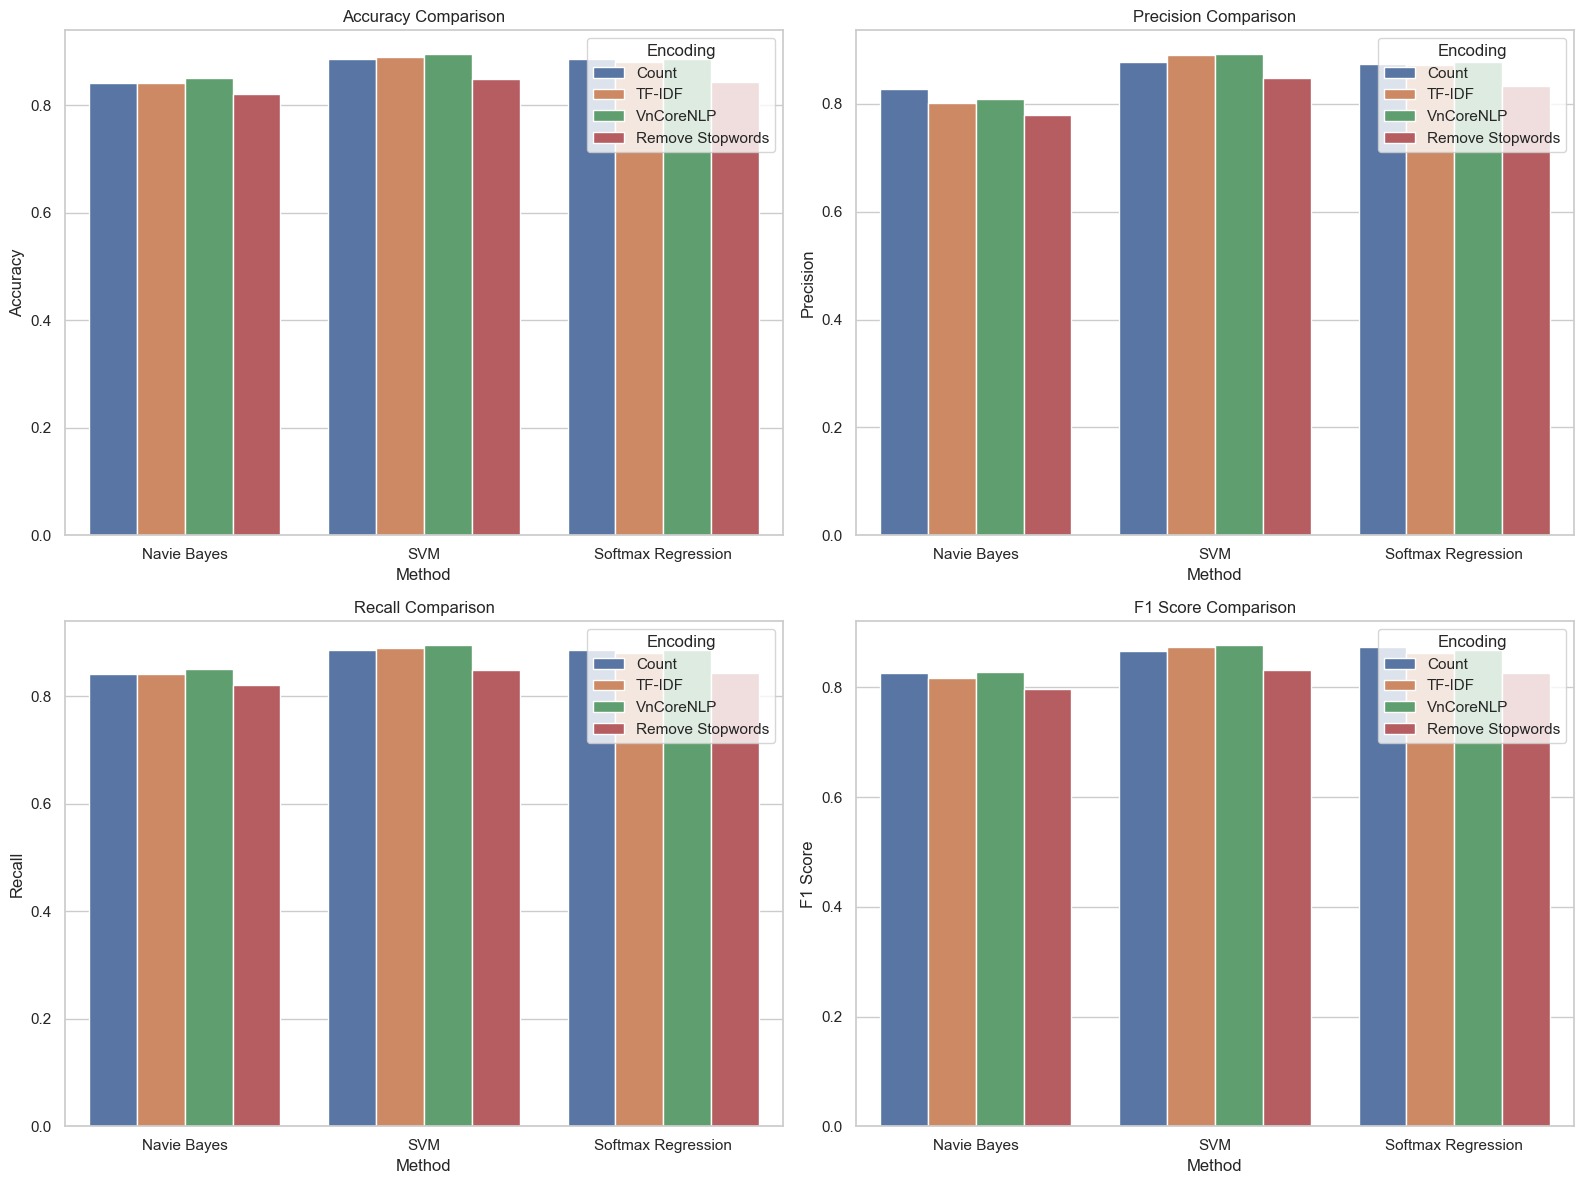

In [27]:
# Thiết lập kiểu hiển thị của seaborn
sns.set(style="whitegrid")

# Thiết lập biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Vẽ biểu đồ Accuracy
sns.barplot(x='Method', y='Accuracy', hue='Encoding', data=df_, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison')

# Vẽ biểu đồ Precision
sns.barplot(x='Method', y='Precision', hue='Encoding', data=df_, ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison')

# Vẽ biểu đồ Recall
sns.barplot(x='Method', y='Recall', hue='Encoding', data=df_, ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison')

# Vẽ biểu đồ F1 Score
sns.barplot(x='Method', y='F1 Score', hue='Encoding', data=df_, ax=axes[1, 1])
axes[1, 1].set_title('F1 Score Comparison')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Nhận xét
Từ đồ thị, SVM là phương pháp phân loại hiệu quả nhất trong các thử nghiệm này, và việc sử dụng các kỹ thuật xử lý ngôn ngữ tự nhiên chuyên biệt như VnCoreNLP hoặc loại bỏ từ dừng có thể giúp cải thiện hiệu suất của mô hình phân tích cảm xúc tiếng Việt, nhưng trong trường hợp với bộ dữ liệu này dựa vào đồ thị ta thấy kĩ thuật xử lý ngôn ngữ tự nhiên chuyên biệt như VnCoreNLP cải thiện hiệu suất của mô hình trong khi kĩ thuật loại bỏ từ dừng làm hiệu xuất mô hình giảm đi. Tuy nhiên, các phương pháp mã hóa cơ bản như Count, TF-IDF kĩ thuật loại bỏ từ dừng cũng cho thấy kết quả khá tốt, và sự khác biệt giữa các phương pháp mã hóa không quá lớn. 